# Elliptical Orbit determined using Location and Velocity
## Given:
A spacecraft orbiting the earth with inertial position and velocity:
$$\bar{r}_1 = (0.382\hat{x} - 3.38 \hat{y} - 1.44 \hat{z}) R_{Earth}$$
$$\bar{v}_1 = 3.35\hat{x} - 0.12 \hat{y} - 1.33 \hat{z} (km/s)$$

## Find:
a) Orbital parameters $a$, $e$, $i$, $\omega$, $\Omega$, $r$, $v$, $\gamma$, $\theta^*$, $M$, $E$, $(t-t_p)$

b) Plot and mark position.

In [1]:
# Import Functions and basic info
import sys
sys.path.append('../')
from Functions.Universe import Solar_S as SS
from Functions import Keplarian_fnc as kp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r1_in = np.array([0.382, -3.38, -1.44])*SS.loc['Earth','r']
v1_in = np.array([3.35, -0.12, -1.33])
miu = SS.loc['Earth','miu']

### Part a)

In [19]:
r1_mag = np.linalg.norm(r1_in)
v1_mag = np.linalg.norm(v1_in)

Eps = kp.Eps_miu_r_v(miu, r1_mag, v1_mag)
a = kp.a_miu_Eps(miu, Eps)
h = np.linalg.norm(np.cross(r1_in, v1_in))
p = kp.p_miu_h(miu, h)
e = kp.e_Eps_h_miu(Eps, h, miu)
thst = kp.thst.thst_rvec_vvec_p_e(r1_in, v1_in, p, e)

h_hat = np.cross(r1_in, v1_in)/ h
theta_hat = np.cross(h_hat, r1_in/r1_mag)

i = kp.i.i_hunit(h_hat)
Omega = kp.Omega.Omega_hunit(h_hat)
theta = kp.theta.theta_thetaunit(theta_hat)
omega = theta - thst

r1 = kp.distance.keplar_r(p, e, thst.rad, i=i.rad, omega=omega.rad, Omega=Omega.rad)
gamma = kp.gamma.gamma_h_r_v_thst(h, r1.mag, v1_mag, thst.rad)


E = kp.E.E_thst(thst.rad, e)
M = kp.M.M_E_e(E.rad, e)
n = kp.n_miu_a(miu, a)
t_tp_s = M.rad/n
t_tp_h = t_tp_s/3600

### Part b)

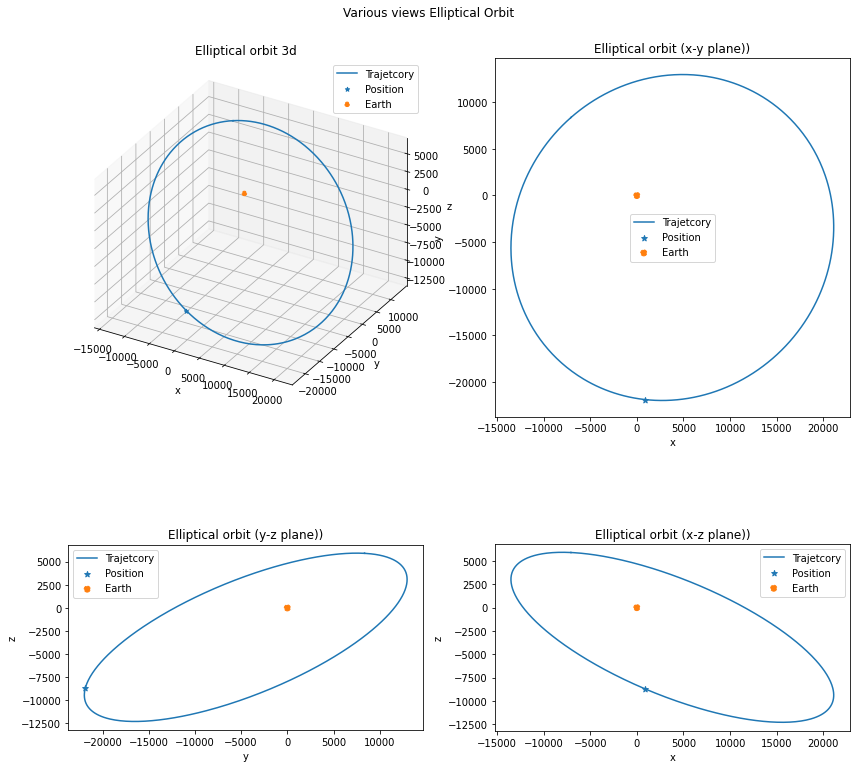

In [22]:
thst_traj = kp.angle.degree(np.linspace(0, 360, 500))
r_traj = kp.distance.keplar_r(p, e, thst_traj.rad, i=i.rad, omega=omega.rad, Omega=Omega.rad)

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_proj_type('ortho')
ax1.plot(r_traj.eci[:,0], r_traj.eci[:,1], r_traj.eci[:,2], label='Trajetcory')
ax1.scatter(r1.eci[0], r1.eci[1], r1.eci[2], label='Position', marker='*')
ax1.scatter(0, 0, 0, ls = '--', label='Earth')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Elliptical orbit 3d')
ax1.legend()

ax2.plot(r_traj.eci[:,0], r_traj.eci[:,1], label='Trajetcory')
ax2.scatter(r1.eci[0], r1.eci[1], label='Position', marker='*')
ax2.scatter(0, 0, ls = '--', label='Earth')
ax2.set_aspect('equal', 'box')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Elliptical orbit (x-y plane))')
ax2.legend()

ax3.plot(r_traj.eci[:,1], r_traj.eci[:,2], label='Trajetcory')
ax3.scatter(r1.eci[1], r1.eci[2], label='Position', marker='*')
ax3.scatter(0, 0, ls = '--', label='Earth')
ax3.set_aspect('equal', 'box')
ax3.set_xlabel('y')
ax3.set_ylabel('z')
ax3.set_title('Elliptical orbit (y-z plane))')
ax3.legend()

ax4.plot(r_traj.eci[:,0], r_traj.eci[:,2], label='Trajetcory')
ax4.scatter(r1.eci[0], r1.eci[2], label='Position', marker='*')
ax4.scatter(0, 0, ls = '--', label='Earth')
ax4.set_aspect('equal', 'box')
ax4.set_xlabel('x')
ax4.set_ylabel('z')
ax4.set_title('Elliptical orbit (x-z plane))')
ax4.legend()

fig.suptitle('Various views Elliptical Orbit')
fig.tight_layout()
fig.subplots_adjust(top=0.95)